In [106]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
%matplotlib inline

In [2]:
#np.random.seed(100)
T=1; N=500*T; dt=float(T)/N; 
t1000=np.linspace(0,T,N)
N_exp=1000
W1000=np.zeros((N_exp,N))
for i in range(N_exp):
    dW=np.sqrt(dt)*np.random.randn(N)
    W1000[i][1:N]=np.cumsum(dW[1:N])
   

W_mean1000= np.mean(W1000,0)
W_var1000=np.var(W1000,0)
#print W_10
#print W_mean_10

In [120]:
T=1; N=5*T; dt=float(T)/N; 
t=np.linspace(0,T,N+1)
N_exp=3
x=np.zeros((N_exp,N))
#N=number of steps in a single sim, N_exp=no. of times expt is repeated.

rand_kick=np.random.randn(N_exp, N)
dx=np.sqrt(dt)*rand_kick
x=np.cumsum(dx,axis=1)
x=np.insert(x,0,0,axis=1) #inserting zeros in first column becoz every walker starts with zero
x_mean=np.mean(x,axis=0)
x_var=np.var(x,axis=0)


In [124]:
#print x_mean
print LA.norm(x_mean-0.0, np.inf)
print LA.norm(x_var-t, np.inf)

0.291230430272
0.977799881339
[ 0.          0.05270435 -0.33294756 -0.20386007  0.11313322  0.97779988]
0.977799881339


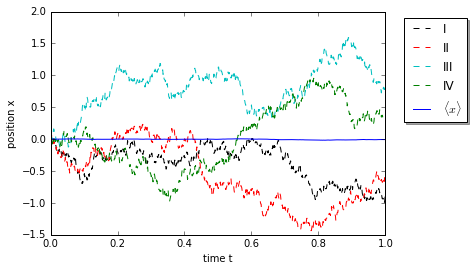

In [105]:
plt.ylabel("position x")
plt.xlabel("time t")
plt.plot(t,x[0], 'k--', label="I")
plt.plot(t,x[1], 'r--',label="II")
plt.plot(t,x[2], 'c--',label="III")
plt.plot(t,x[3], 'g--',label="IV")
plt.plot(t,x_mean, 'b', label=r"$\langle x \rangle$")
plt.legend(loc='best')


art=[]
lgd=plt.legend(loc=9, bbox_to_anchor=(1.15, 1.0), ncol=1, shadow=True)
art.append(lgd)
plt.savefig("x_mean.eps", additional_artists=art,bbox_inches="tight")


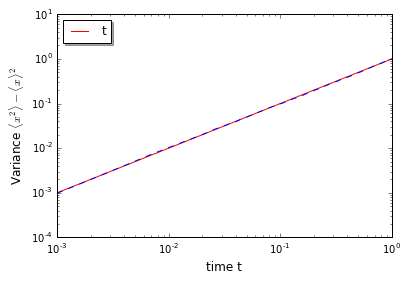

In [104]:
plt.ylabel(r"variance $\langle x^2 \rangle - \langle x \rangle^2$", fontsize=12)
plt.xlabel("time t",fontsize=12)
plt.loglog(t, 1.0*t,'r', label="t")
plt.loglog(t,x_var, 'b--')
plt.legend(loc='upper left', shadow=True)
plt.savefig("x_var.eps")

The mean of position is not really trustworthy. It doesn't nicely flutuates around 0. It's as if I am looking at the individual realization. The variance is nice, but not the mean. What is the coeffiecient? $<x^2> = 2 D t$.Find D here.

https://github.com/alu042/SDE-higham


averr =  0.0312181600383


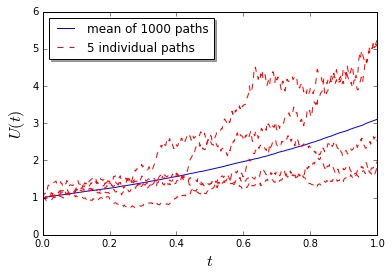

In [5]:
np.random.seed(100)
T=1; N=500; dt=float(T)/N; 
t=np.linspace(0,T,N+1)

M=1000
dW=np.sqrt(dt)*np.random.randn(M,N)
W=np.cumsum(dW,1)
U=np.exp(np.tile(t[1:],(M,1))+0.5*W)
Umean=np.mean(U,axis=0)
Umean=np.insert(Umean,0,1)


plt.plot(t,Umean)
for i in range(5):
    plt.plot(t,np.concatenate(([1,],U[i,:])), 'r--')

plt.legend(('mean of 1000 paths', '5 individual paths'),loc=2,shadow=True)
plt.xlabel('$t$',fontsize=16)
plt.ylabel('$U(t)$',fontsize=16)

averr = np.linalg.norm(Umean-np.exp(9*t/8),np.inf)
print 'averr = ', averr